In [1]:
import matplotlib.pyplot as plt

import h5py
import numpy as np
import pandas as pd
import torch

from collections import Counter

/g/g92/noh1/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import clear_output
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [3]:
os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /g/g92/noh1/fast2


In [4]:
data_dir = "./data/mpro"

In [5]:
cinfo_file_1 = "updated_mpro_positive_compounds.csv"
cinfo_1 = pd.read_csv(os.path.join(data_dir, cinfo_file_1))
cinfo_1 = cinfo_1[cinfo_1.activity_type == "pIC50"]
cinfo_1

,compound_id,SMILES,relation,activity,activity_type
0,GoStar-gvk_125547054,CC(C)(C)NC(=O)N[C@H](C(=O)N1C[C@H]2[C@@H]([C@H...,NaN,5.681024,pIC50
1,PostEra-EDJ-MED-cf4b0d25-4,CC(=O)NC(C(=O)Nc1cncc2ccccc12)c1cccc(Cl)c1,NaN,5.039634,pIC50
2,PostEra-EDJ-MED-976a33d5-1,CNC(=O)C1(N2CC3(CCN(c4cncc5ccccc45)C3=O)c3cc(C...,NaN,7.044005,pIC50
3,PostEra-MAT-POS-044491d2-1,Cc1ccncc1NC(=O)Cc1cc(Cl)cc(NC2CCCC2O)c1,NaN,4.705479,pIC50
4,PostEra-MAT-POS-932d1078-3,CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2c(F)cc(F)cc21,NaN,6.691330,pIC50
...,...,...,...,...,...
2264,GoStar-gvk_125563878,CC(C)C[C@H](NC(=O)OCC(C)(C)c1cccc(Cl)c1)C(=O)N...,NaN,7.000000,pIC50
2265,GoStar-gvk_125563953,O=C[C@H](CC1CC2(CCCC2)NC1=O)NC(=O)[C@H](CC1CCC...,NaN,6.975925,pIC50
2266,GoStar-gvk_125563804,CCCCCOC(=O)N[C@@H](CC1CCCCC1)C(=O)N[C@H](C=O)C...,NaN,4.422508,pIC50
2267,GoStar-gvk_125436286,CC(C)(C)C[C@H](NC(=O)c1cc2c(Cl)cc(Cl)cc2[nH]1)...,>,5.698970,pIC50


In [6]:
def remove_substring(cid, substrings_to_remove=["PostEra-", "GoStar-", "other-"]):
    for substring in substrings_to_remove:
        cid = cid.replace(substring, "")
    return cid

cids_1 = set([remove_substring(cid) for cid in cinfo_1.compound_id])
list(cids_1)[:10]

['gvk_125405684',
 'ALP-POS-fe871b40-16',
 'TRY-UNI-2eddb1ff-6',
 'MAT-POS-5cd9ea36-4',
 'gvk_124984203',
 'gvk_125563829',
 'MAK-UNK-d4768348-1',
 'EDJ-MED-e69ed63d-6',
 'ALP-POS-88a7a97e-33',
 'DAN-MCD-7eba3d41-1']

In [7]:
cinfo_1["CID"] = cinfo_1["compound_id"].apply(remove_substring)
cinfo_1

,compound_id,SMILES,relation,activity,activity_type,CID
0,GoStar-gvk_125547054,CC(C)(C)NC(=O)N[C@H](C(=O)N1C[C@H]2[C@@H]([C@H...,NaN,5.681024,pIC50,gvk_125547054
1,PostEra-EDJ-MED-cf4b0d25-4,CC(=O)NC(C(=O)Nc1cncc2ccccc12)c1cccc(Cl)c1,NaN,5.039634,pIC50,EDJ-MED-cf4b0d25-4
2,PostEra-EDJ-MED-976a33d5-1,CNC(=O)C1(N2CC3(CCN(c4cncc5ccccc45)C3=O)c3cc(C...,NaN,7.044005,pIC50,EDJ-MED-976a33d5-1
3,PostEra-MAT-POS-044491d2-1,Cc1ccncc1NC(=O)Cc1cc(Cl)cc(NC2CCCC2O)c1,NaN,4.705479,pIC50,MAT-POS-044491d2-1
4,PostEra-MAT-POS-932d1078-3,CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2c(F)cc(F)cc21,NaN,6.691330,pIC50,MAT-POS-932d1078-3
...,...,...,...,...,...,...
2264,GoStar-gvk_125563878,CC(C)C[C@H](NC(=O)OCC(C)(C)c1cccc(Cl)c1)C(=O)N...,NaN,7.000000,pIC50,gvk_125563878
2265,GoStar-gvk_125563953,O=C[C@H](CC1CC2(CCCC2)NC1=O)NC(=O)[C@H](CC1CCC...,NaN,6.975925,pIC50,gvk_125563953
2266,GoStar-gvk_125563804,CCCCCOC(=O)N[C@@H](CC1CCCCC1)C(=O)N[C@H](C=O)C...,NaN,4.422508,pIC50,gvk_125563804
2267,GoStar-gvk_125436286,CC(C)(C)C[C@H](NC(=O)c1cc2c(Cl)cc(Cl)cc2[nH]1)...,>,5.698970,pIC50,gvk_125436286


In [8]:
cinfo_file_2 = "postera_activity_data_10132021.csv"
cinfo_2 = pd.read_csv(os.path.join(data_dir, cinfo_file_2))
cinfo_2

,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,COC(=O)CN(C)S(=O)(=O)N1Cc2ccc(Cl)cc2C(C(=O)Nc2...,MAT-POS-af1eef35-2,MAT-POS-af1eef35-2,NaN,NaN,NaN,NaN,NaN,0.064774,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
1,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@H](C(=O)Nc3c...,MAT-POS-e194df51-1,MAT-POS-e194df51-1,NaN,NaN,NaN,NaN,NaN,0.036834,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
2,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@@H](C(=O)Nc3...,MAT-POS-e194df51-2,MAT-POS-e194df51-2,NaN,NaN,NaN,NaN,NaN,4.112868,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
3,O=C(Nc1cncc2cc(F)ccc12)[C@H]1CCS(=O)(=O)c2ccc(...,MAT-POS-86c60949-1,MAT-POS-86c60949-1,NaN,NaN,NaN,NaN,NaN,24.543083,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
4,CC(C)(O)c1ccc2cncc(NC(=O)C3CCNc4ccc(Cl)cc43)c2c1,MAT-POS-86c60949-2,MAT-POS-86c60949-2,NaN,NaN,NaN,NaN,NaN,0.353118,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1497,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1498,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
1499,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN


In [9]:
cinfo_2.f_avg_pIC50.isna().value_counts()

True    1501
Name: f_avg_pIC50, dtype: int64

In [10]:
cids_2 = set(cinfo_2.CID)
intersection = cids_1.intersection(cids_2)
len(intersection)

941

In [11]:
def xc50topxc50_for_nm(x) :
   """
   Convert XC50 values measured in nanomolars to -log10 (PX50)
  
   Args :
     x (float): input XC50 value measured in nanomolars
   Returns :
       float: -log10 value of x
   """
   return -np.log10((x/1000000.0))

In [12]:
xc50 = "f_avg_IC50"

cinfo_2["converted_pIC50"] = cinfo_2[xc50].apply(xc50topxc50_for_nm)
cinfo_2

,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id,converted_pIC50
0,COC(=O)CN(C)S(=O)(=O)N1Cc2ccc(Cl)cc2C(C(=O)Nc2...,MAT-POS-af1eef35-2,MAT-POS-af1eef35-2,NaN,NaN,NaN,NaN,NaN,0.064774,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,7.188602
1,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@H](C(=O)Nc3c...,MAT-POS-e194df51-1,MAT-POS-e194df51-1,NaN,NaN,NaN,NaN,NaN,0.036834,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,7.433750
2,N#CC1(CS(=O)(=O)N2Cc3ccc(Cl)cc3[C@@H](C(=O)Nc3...,MAT-POS-e194df51-2,MAT-POS-e194df51-2,NaN,NaN,NaN,NaN,NaN,4.112868,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,5.385855
3,O=C(Nc1cncc2cc(F)ccc12)[C@H]1CCS(=O)(=O)c2ccc(...,MAT-POS-86c60949-1,MAT-POS-86c60949-1,NaN,NaN,NaN,NaN,NaN,24.543083,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,4.610071
4,CC(C)(O)c1ccc2cncc(NC(=O)C3CCNc4ccc(Cl)cc43)c2c1,MAT-POS-86c60949-2,MAT-POS-86c60949-2,NaN,NaN,NaN,NaN,NaN,0.353118,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,6.452080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,4.004321
1497,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,4.265416
1498,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,4.196851
1499,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,4.573812


In [17]:
merged_cinfo = pd.merge(cinfo_1, cinfo_2, on="CID")
merged_cinfo = merged_cinfo[["CID", "activity", "converted_pIC50", "f_avg_IC50", "SMILES_x"]]

merged_cinfo.rename(
    columns={
        "activity": "pIC50",
        "SMILES_x": "SMILES",
    },
    inplace=True
)
# merged_cinfo.columns = ["CID", "pIC50", "converted_pIC50"]

merged_cinfo["difference"] = abs(merged_cinfo["converted_pIC50"] - merged_cinfo["pIC50"])

merged_cinfo

,CID,pIC50,converted_pIC50,f_avg_IC50,SMILES,difference
0,EDJ-MED-cf4b0d25-4,5.039634,5.039634,9.127791,CC(=O)NC(C(=O)Nc1cncc2ccccc12)c1cccc(Cl)c1,0.000000e+00
1,MAT-POS-044491d2-1,4.705479,4.705479,19.702500,Cc1ccncc1NC(=O)Cc1cc(Cl)cc(NC2CCCC2O)c1,0.000000e+00
2,MAT-POS-932d1078-3,6.691330,6.719243,0.190878,CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2c(F)cc(F)cc21,2.791344e-02
3,MAT-POS-4223bc15-7,6.609181,6.609181,0.245934,O=C(Nc1cncc2ccccc12)C1CN(S(=O)(=O)C2COC2)Cc2cc...,0.000000e+00
4,MAT-POS-4223bc15-21,5.074109,5.074109,8.431234,O=C(O)CN1Cc2ccc(Cl)cc2C(C(=O)Nc2cncc3ccccc23)C1,8.881784e-16
...,...,...,...,...,...,...
936,RUB-POS-1325a9ea-14,5.825061,5.825061,1.496025,Cn1ncc2cncc(NC(=O)Cc3cccc(Cl)c3)c21,0.000000e+00
937,DAR-DIA-0587064e-15,5.604150,5.604150,2.488000,O=C(Nc1cncc2ccccc12)C1CCOc2c(OCC3CC3)cc(Cl)cc21,0.000000e+00
938,MAT-POS-bb423b95-1,5.100089,5.100089,7.941658,O=C(Cc1cccc(Cl)c1)Nc1cncc2cnccc12,8.881784e-16
939,ALP-POS-95f71980-4,5.370796,5.370796,4.257987,CC(C)(C)c1ccc(N(C(=O)c2ccon2)C(C(=O)NCCc2cccc(...,0.000000e+00


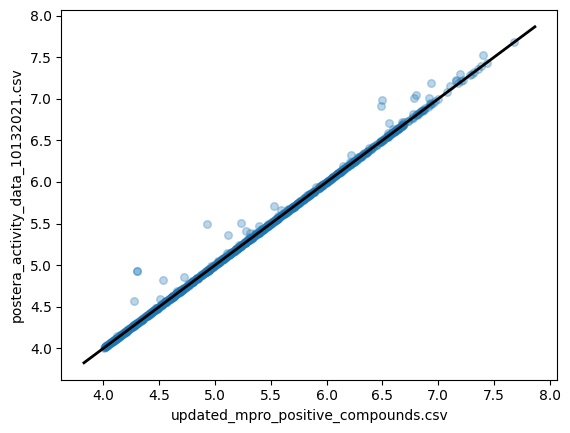

In [18]:
s = 30
alpha = 0.3
margin = 0.2

plt.scatter(merged_cinfo["pIC50"], merged_cinfo["converted_pIC50"], s=s, alpha=alpha)

x = y = plt.xlim()
plt.plot(x, y, linewidth=2, color="black")

plt.xlabel(cinfo_file_1)
plt.ylabel(cinfo_file_2)
plt.show()

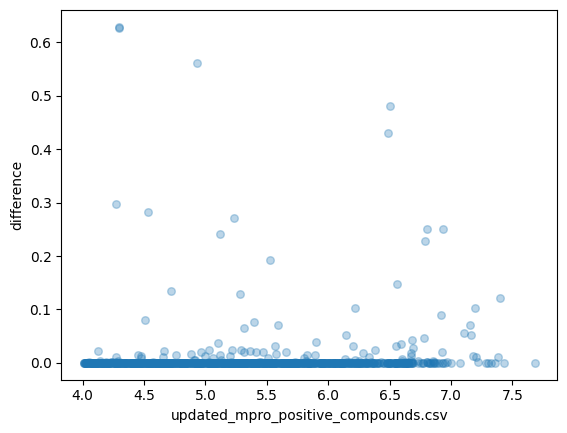

In [19]:
s = 30
alpha = 0.3
margin = 0.2

plt.scatter(merged_cinfo["pIC50"], merged_cinfo["difference"], s=s, alpha=alpha)

# x = y = plt.xlim()
# plt.plot(x, y, linewidth=2, color="black")

plt.xlabel(cinfo_file_1)
plt.ylabel("difference")
plt.show()

In [32]:
margin = 0.05

merged_cinfo = merged_cinfo.sort_values("difference", ascending=False)
different_cinfo = merged_cinfo[merged_cinfo["difference"] > margin]
different_cinfo

,CID,pIC50,converted_pIC50,f_avg_IC50,SMILES,difference
72,LON-WEI-9739a092-4,4.297098,4.926541,11.842931,CCN(Cc1ccc(F)cc1)c1cc(Cl)cc(CC(=O)Nc2cncc3cccc...,0.629443
138,LON-WEI-9739a092-7,4.297027,4.924022,11.911826,O=C(Cc1cc(Cl)cc(NCc2ccc(Br)cc2)c1)Nc1cncc2ccccc12,0.626995
384,LON-WEI-9739a092-5,4.931989,5.493241,3.211879,Cc1ccc2nc(Nc3cc(Cl)cc(CC(=O)Nc4cncc5ccccc45)c3...,0.561252
62,MAT-POS-53907a1c-3,6.499756,6.980247,0.104653,O=C1CC(Oc2cc(Cl)cc(N(CCC3CCCCC3)C(=O)Nc3cncc4c...,0.480491
84,MAT-POS-090737b9-1,6.483927,6.913784,0.121960,C=CC(=O)N(C(=O)C1CCOc2ccc(Cl)cc21)c1cncc2ccccc12,0.429857
541,EDJ-MED-12c115cc-2,4.272469,4.569500,26.946346,O=C(Nc1cncc2ccccc12)[C@H]1COc2ccc(Cl)cc21,0.297031
728,STE-KUL-d79e3d6a-4,4.536107,4.818859,15.175424,C#CCCCC(=O)N[C@@H](CC)C(=O)N[C@H](C(=O)N[C@@H]...,0.282752
638,ALP-POS-c59291d4-6,5.231339,5.502488,3.144215,CC(C)(C)NC(=O)C(c1cccnc1)N(C(=O)c1ccco1)c1ccc(...,0.271149
511,MAT-POS-af1eef35-2,6.938035,7.188602,0.064774,COC(=O)CN(C)S(=O)(=O)N1Cc2ccc(Cl)cc2C(C(=O)Nc2...,0.250567
42,EDJ-MED-1981ceba-2,6.801133,7.051388,0.088841,O=C(Nc1cncc2ccccc12)C1CN(S(=O)(=O)N2CCC2)Cc2cc...,0.250255


In [30]:
# different_cinfo.to_csv("difference.csv", index=False)